In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline 
#matplotlib 에서 inline함수는 그림을 보여줌

In [2]:
#df = pd.read_csv("/content/drive/MyDrive/pasteurizer01.csv",index_col="STD_DT") 
df1 = pd.read_csv("/content/drive/MyDrive/final_dtdt_1.csv", index_col="STD_DT")

In [4]:
# df = df.interpolate(method="linear") 
#interpolate 함수를 이용해서 널값에 주변값을 비교해서 알아서 처리함

In [3]:
df1

,Unnamed: 0,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
STD_DT,,,,,,
2020-03-04 6:00,0,1,1,551,524,OK
2020-03-04 6:30,1,1,1,584,536,OK
2020-03-04 7:00,2,1,1,584,536,OK
2020-03-04 7:30,3,1,1,585,536,OK
2020-03-04 8:00,4,1,1,585,536,OK
...,...,...,...,...,...,...
2020-11-11 15:00,11042,1,1,595,562,OK
2020-11-11 15:30,11043,1,1,553,557,OK
2020-11-11 16:00,11044,1,1,592,554,OK


In [4]:
df1.shape

(11047, 6)

In [5]:
df1 = df1.replace({'INSP' : 'OK'}, 1) 
#INSP OK=1 NG=0으로 범주화

In [6]:
df1 = df1.replace({'INSP' : 'NG'}, 0) 

In [7]:
# train data랑 test 데이터 나눔
x_train = df1.iloc[:8285, 2:6].values
y_train = df1.iloc[:8285, [-1]].values
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)

# train과 test를 8:2 로 나눠서 진행하였는데 모델 과적합이 나와서
# 과적합 잡으려고 validation 값 6:2:2
# x_val = df.iloc[134909:168635, 1:5].values
# y_val = df.iloc[134909:168635, [-1]].values
print(x_train.shape, y_train.shape)

x_test = df1.iloc[8836:, 2:6].values  
y_test = df1.iloc[8836:, [-1]].values
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

print(x_test.shape, y_test.shape)


(8285, 4) (8285, 1)
(2211, 4) (2211, 1)


In [16]:
x_train.shape[1]

4

In [17]:
len(x_train)

8285

In [18]:
# dataset parameters.
nb_classes  = y_train.shape[1]  # 아웃풋 개수 
nb_features = x_train.shape[1] # 뉴런갯수
print(nb_classes, nb_features)

# training HyperParameters
learning_rate  = 0.00001 # 0.01더 곱해봄
batch_size     = 256 # 128
epochs         = 100

# network hyperparameters
n_hidden_1 = 7 # 1st layer number of neurons.
n_hidden_2 = 7 # 2nd layer number of neurons.

n_train = x_train.shape[0] 
n_test  = x_test.shape[0] 

1 4


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD
from sklearn.metrics import *
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()  # 모델선언
model.add(Dense(units = n_hidden_1, activation='sigmoid', input_shape=(nb_features,)))   # neuron, input column개수
model.add(Dense(n_hidden_2, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(nb_classes, activation='sigmoid'))

# ouput column개수
model.summary()

In [ ]:
# model = Sequential()
# model.add(Dense(128.activation='sigmoid',input))

In [61]:
model.compile(loss='binary_crossentropy',   # y = not one-hot encoding but number
              optimizer='RMSProp', # adam 에서 RMS로
              metrics=['accuracy'])

In [70]:
#early_stopping = EarlyStopping(monitor='val_loss', patience = 10)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=500,
                    verbose=1, 
                    #callbacks=[early_stopping],
                    validation_data = (x_test, y_test)
                    )
# validation_data=(x_train, y_train)
#validation_split=0.25

Epoch 1/500
33/33 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 0.9716 - val_loss: 4.4642e-07 - val_accuracy: 1.0000
Epoch 2/500
33/33 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9690 - val_loss: 4.6443e-07 - val_accuracy: 1.0000
Epoch 3/500
33/33 [==============================] - 0s 4ms/step - loss: 0.0394 - accuracy: 0.9738 - val_loss: 4.8113e-07 - val_accuracy: 1.0000
Epoch 4/500
33/33 [==============================] - 0s 4ms/step - loss: 0.0404 - accuracy: 0.9730 - val_loss: 4.4396e-07 - val_accuracy: 1.0000
Epoch 5/500
33/33 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 0.9725 - val_loss: 4.2665e-07 - val_accuracy: 1.0000
Epoch 6/500
33/33 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9713 - val_loss: 4.2523e-07 - val_accuracy: 1.0000
Epoch 7/500
33/33 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9701 - val_loss: 4.3427e-07 - val_ac

KeyboardInterrupt: ignored

In [63]:
y_pred = model.predict(x_test)

70/70 [==============================] - 0s 1ms/step


In [64]:
y_pred

array([[1.1299894e-06],
       [1.1303256e-06],
       [1.1304378e-06],
       ...,
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [65]:
# y_pred 값이 array 형식이어서 
y_pr = []
for i in y_pred:
  if i >= 0.5:
    y_pr.append(1)
  else:
    y_pr.append(0)

In [66]:
y_pr = np.asarray(y_pr)

In [67]:
df1.MIXA_PASTEUR_STATE.value_counts()

1    6233
0    4814
Name: MIXA_PASTEUR_STATE, dtype: int64

In [68]:
# 정확도 출력
acc = accuracy_score(y_test, y_pr)
print('accuracy_score : ',acc)

accuracy_score :  1.0


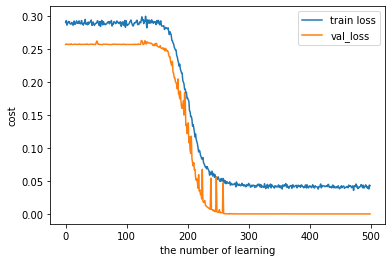

In [69]:
# 5. 모델 학습 과정 표시하기
plt.plot(history.history['loss'],     label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('the number of learning')
plt.ylabel('cost')
plt.legend()
plt.show()